##Logical flow and Scope of the Project

1. Define the problem and objective
2. Collect, Load, Explore the Dataset
3. Data cleaning
4. Feature Engineering
5. Exploratory Data Analysis(EDA)
6. Data Preprocessing
7. Model Building and Evaluation
8. Model Optimization and Tuning
9. Interpret the Results
10. Communication and Visualization


----

##1.Goal of the project
Customer segmentation aims to categorize a customer dataset into distinct groups sharing common traits. These groupings illustrate specific requirements, motivations, and preferences, enabling businesses to tailor their marketing strategies effectively.

---



##2.Collect, Load, Explore the Dataset

###Dataset Attributes

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

----







In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
# loading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/jaydeep-1998/Customer-Segmentation/master/marketing_campaign.csv")

# Shape of the data
data.shape

(2240, 27)

In [243]:
# viewing intial rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [244]:
# Display summary information about the dataset including data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Only income column is having null values. We will fill this null values later with appropriate technique.**

##Data cleaning

In [245]:
# Removing ID column from data as it has no signifance value.
data.drop(columns = ['ID'], inplace = True)

In [246]:
# Calculate the median of the 'Income' column
median_income = data['Income'].median()

# Fill missing values with the median income
data['Income'].fillna(median_income, inplace=True)

In [247]:
# finding duplicate data
data[data.duplicated()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
83,1963,Master,Together,38620.0,0,0,11-05-2013,56,112,17,...,5,3,3,0,0,0,0,0,0,0
179,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,26,...,7,12,2,0,0,0,1,0,0,0
281,1976,Graduation,Together,51369.0,0,1,25-10-2012,84,297,7,...,2,4,8,0,0,0,0,0,0,0
282,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,...,1,6,7,0,0,0,0,0,0,0
363,1978,PhD,Married,37717.0,1,0,23-11-2012,31,9,0,...,0,2,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,1978,Graduation,Together,22775.0,1,0,19-06-2013,40,5,1,...,0,2,8,0,0,0,0,0,0,0
2221,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,26,...,6,11,1,0,1,1,0,0,0,1
2225,1968,Graduation,Together,58554.0,1,1,26-09-2012,55,368,24,...,2,6,7,0,0,0,0,0,0,0
2234,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,...,0,2,7,0,0,0,0,0,0,0


In [248]:
data.drop_duplicates(inplace=True)

# number of duplicates in dataframe
data[data.duplicated()].shape[0]

0

##Feature Engineering

In [249]:
# Library for working with current date and date features
import datetime as dt

# Get the current year
current_year = dt.datetime.now().year

# Calculate age and create a new column 'Age'
data['Age'] = current_year - data['Year_Birth']

# calculating total number of kids
data["Kids"] = data['Kidhome'] + data['Teenhome']

# Calculating total expense of a customer
data["Expenses"] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Calculating total Number of purchases
data["NumTotalPurchases"] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

# Calculating total number of accepted marketing offers
data["TotalAcceptedCmp"] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

##Exploratory Data Analysis

###Univariate analysis - Numerical features

In [250]:
numerical_features = ['Age','Recency','Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','Expenses',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','NumTotalPurchases']

categorical_features = ['Education', 'Marital_Status','Kidhome','Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Kids','TotalAcceptedCmp']

In [251]:
# Summary statistics for numerical features
numerical_features_summary = data[numerical_features].describe()
numerical_features_summary

,Age,Recency,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,Expenses,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,NumTotalPurchases
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,54.212828,48.951895,52346.406220,303.921769,26.234694,167.704568,37.329446,27.176871,43.873178,2.339164,4.098639,606.240525,2.660836,5.770651,5.319728,14.869291
std,11.973898,28.999189,25377.819022,336.528217,39.750728,228.303238,54.657215,41.714004,52.126598,1.942947,2.797577,602.838230,2.933824,3.239113,2.439907,7.663430
min,27.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,24.000000,35701.750000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,69.000000,0.000000,3.000000,3.000000,8.000000
50%,53.000000,49.000000,51381.500000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,396.500000,2.000000,5.000000,6.000000,15.000000
75%,64.000000,74.000000,68242.500000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000,3.000000,6.000000,1046.500000,4.000000,8.000000,7.000000,21.000000
max,130.000000,99.000000,666666.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,2525.000000,28.000000,13.000000,20.000000,44.000000


**Observations and Insights**

* The dataset has a median age of 54 with a variance of 12. However, we need to check the outliers as maximum age 130.
* The average turnaround time for customers is approximately 48 days.
*   'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' is having high stardard deviation. This indicates significant variability in customer spending across these product categories
*   The mean values for both NumStorePurchases and NumWebVisitsMonth are approximately equal. This suggests that a similar number of people visit both the physical store and the website






In [252]:
def plot_histograms_in_grid(data, categories):
    num_plots = len(categories)
    num_rows = (num_plots - 1) // 3 + 1

    fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows*3))
    axes = axes.flatten()

    for i, category in enumerate(categories):
        ax = axes[i]
        sns.histplot(data[category], ax=ax, kde=True)
        ax.set_title(f'Histogram of {category}')
        ax.set_xlabel('')

    # Hide any unused subplots
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

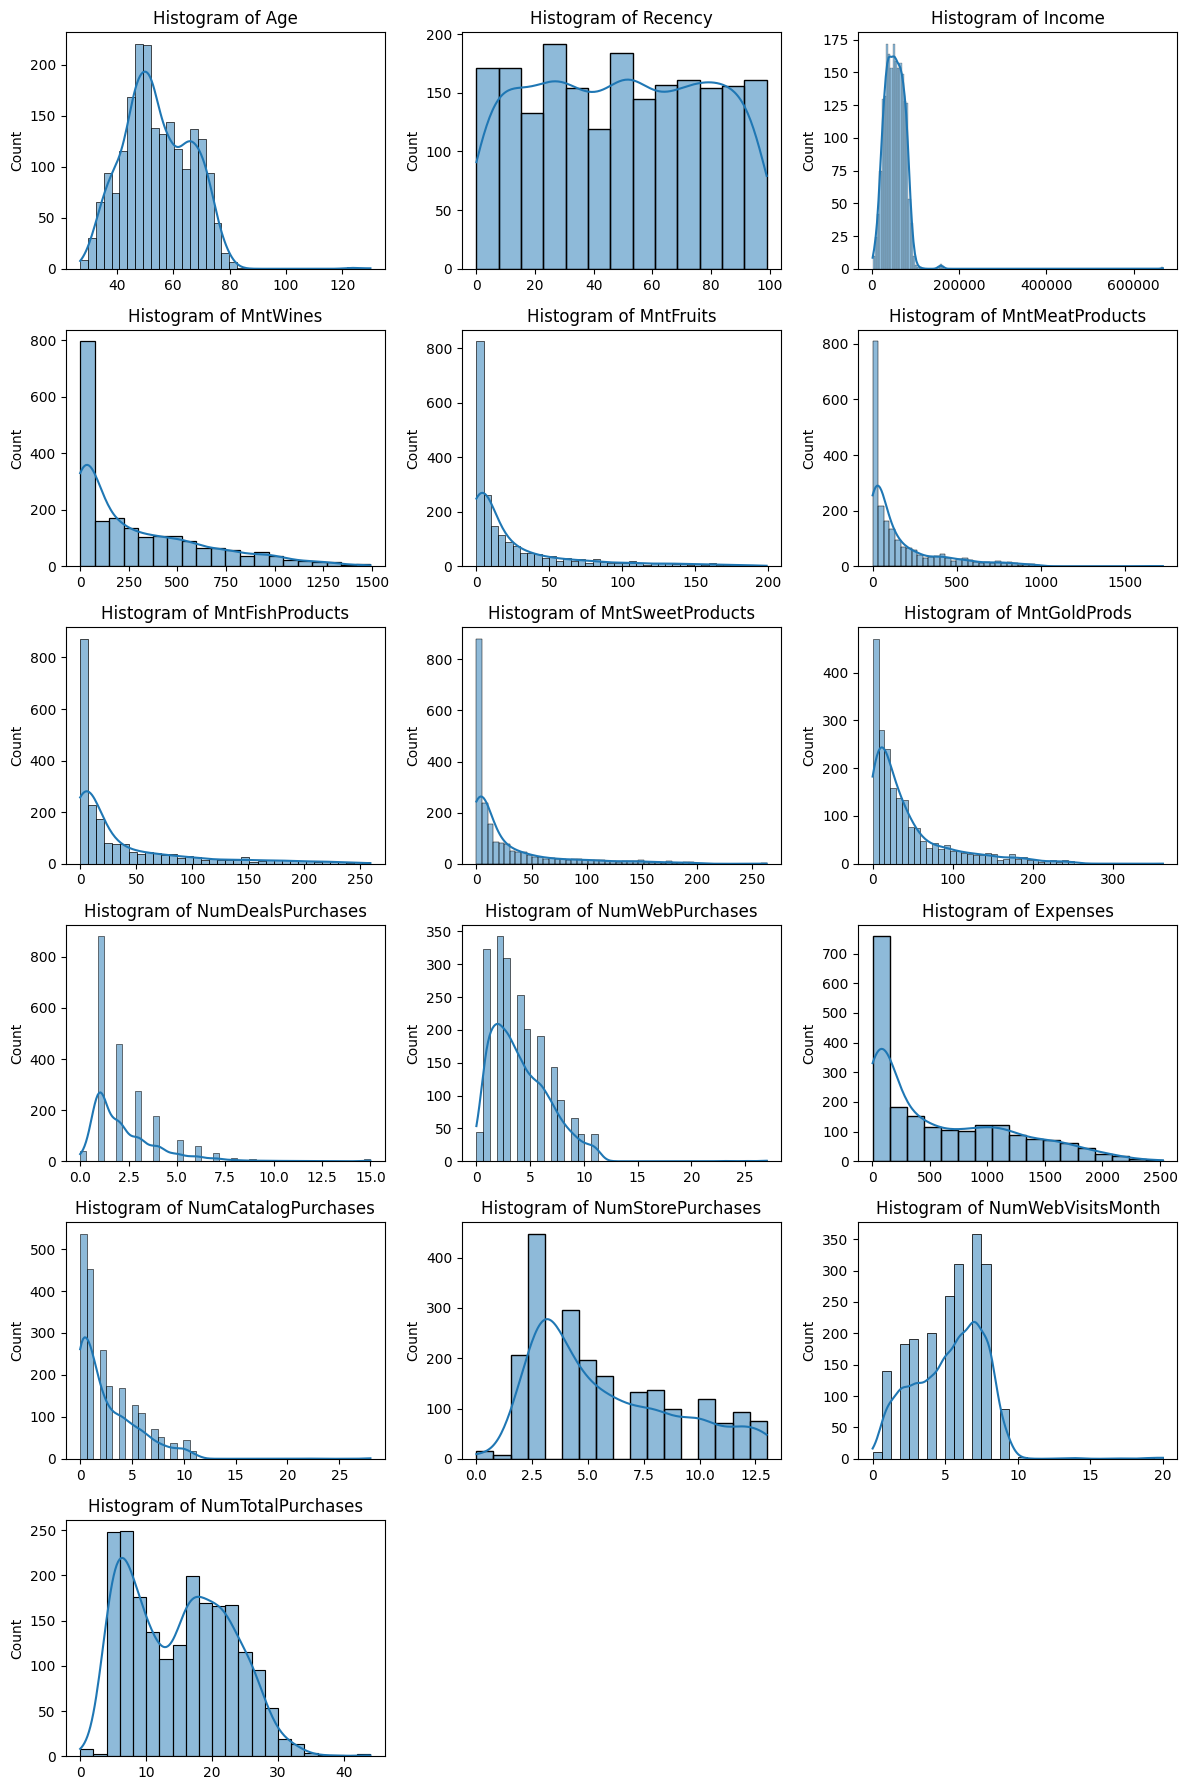

In [253]:
plot_histograms_in_grid(data, numerical_features)

*   The age distribution of customers exhibits a mostly normal distribution, with ages ranging from 30 to 70. There are, however, some outliers with extreme values.

*   In the last month, approximately 200 customers visited the website 1-4 times, indicating sporadic usage. Conversely, about 300 customers visited 5-8 times, suggesting a more engaged user base.

*   For each purchase category ('Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'), the number of people decreases as the frequency of purchasing increases. This indicates a large customer base interested in budget products.

*   A similar trend is observed in the number of web visits, catalog purchases, and in-store visits. A majority of customers make fewer purchases, with the frequency decreasing as the number of purchases increases.

*   Around 850 customers engaged with a single deal, while the number of customers engaging with 2-4 deals falls within the range of 200-400. As the number of deals increases, the number of participants decreases.


In [254]:
def plot_boxplots_in_grid(data, categories):
    num_plots = len(categories)
    num_rows = (num_plots - 1) // 3 + 1

    fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows*3))
    axes = axes.flatten()

    for i, category in enumerate(categories):
        ax = axes[i]
        sns.boxplot(x=data[category], ax=ax)
        ax.set_title(f'Box Plot of {category}')
        ax.set_xlabel('')

    # Hide any unused subplots
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

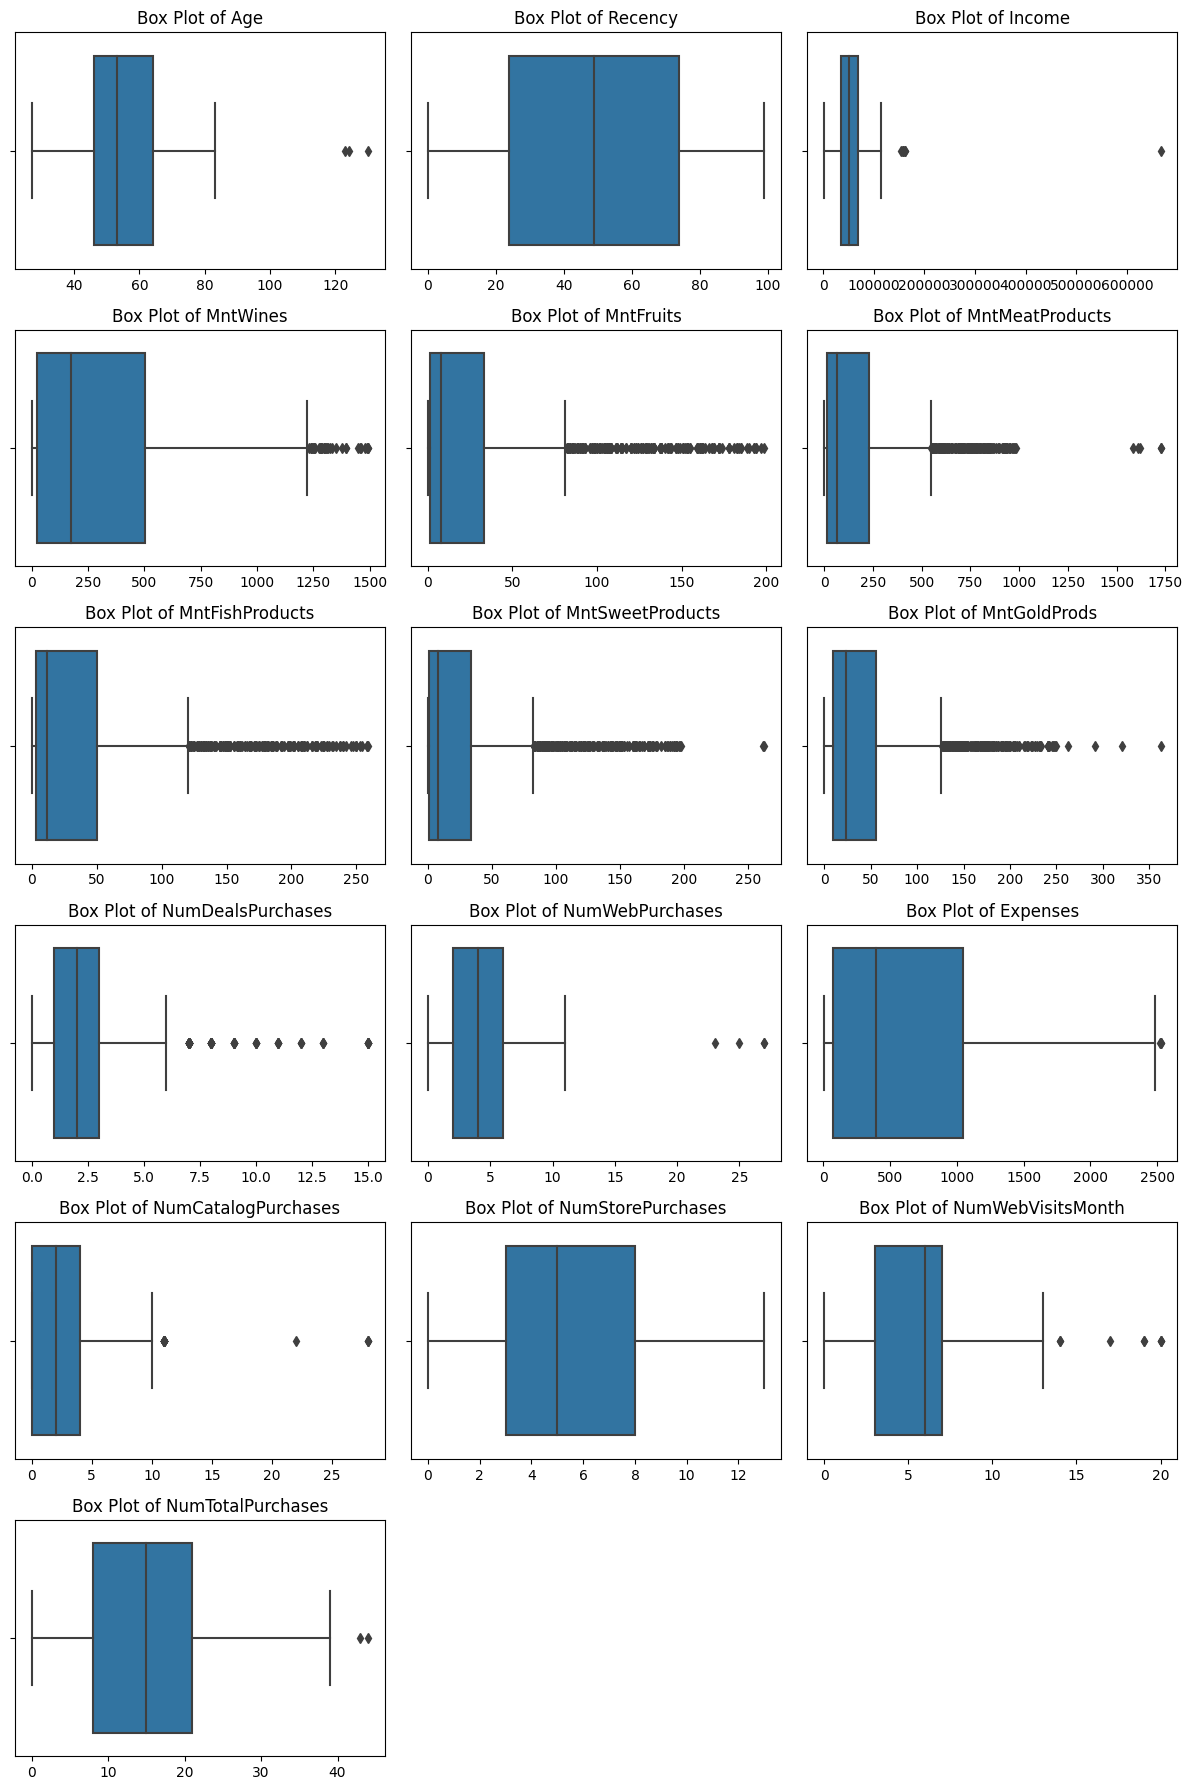

In [255]:
plot_boxplots_in_grid(data, numerical_features)

Removing outliers, data points significantly distant from the majority, is essential in marketing analysis to focus on the broader audience. This process enhances model accuracy and stabilizes inferences.


In [256]:
# Outliers are evident in the following features, as clearly illustrated by the above box plots

feature_with_outliers = ['Age','MntWines', 'Income',
                        'NumWebPurchases','NumCatalogPurchases', 'NumWebVisitsMonth']

# Function to remove outliers using IQR
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_no_outliers

# Remove outliers from the specified column
for feature in feature_with_outliers:
  data = remove_outliers(data, feature)

# Display the DataFrame without outliers
data


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Expenses,NumTotalPurchases,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,1,66,0,1617,25,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,69,2,27,6,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,58,0,776,21,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,39,1,53,8,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,42,1,422,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,...,0,0,0,0,0,37,0,22,4,0
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,56,1,1341,18,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,0,0,0,0,0,42,0,1241,19,1
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,67,1,843,23,0


###Univariate analysis - Categorical Features

In [257]:
# Initialize an empty list to store dictionaries
result_list = []

# Iterate through categorical columns
for col in categorical_features:

    # Get value counts as a dictionary
    value_counts_dict = data[col].value_counts().to_dict()
    number_of_categories = data[col].nunique()

    # Append to the result list as a tuple (column_name, value_counts_dict)
    result_list.append((col,number_of_categories, value_counts_dict))

result_df = pd.DataFrame(result_list, columns=['category','number of category','Value_Counts'])
result_df

,category,number of category,Value_Counts
0,Education,5,"{'Graduation': 998, 'PhD': 419, 'Master': 331,..."
1,Marital_Status,8,"{'Married': 768, 'Together': 502, 'Single': 43..."
2,Kidhome,3,"{0: 1120, 1: 820, 2: 43}"
3,Teenhome,3,"{0: 1008, 1: 928, 2: 47}"
4,AcceptedCmp3,2,"{0: 1840, 1: 143}"
5,AcceptedCmp4,2,"{0: 1842, 1: 141}"
6,AcceptedCmp5,2,"{0: 1864, 1: 119}"
7,AcceptedCmp1,2,"{0: 1863, 1: 120}"
8,AcceptedCmp2,2,"{0: 1966, 1: 17}"
9,Complain,2,"{0: 1964, 1: 19}"


*    Upon reviewing the education category, we identified an unconventional entry labeled '2n Cycle'. For consistency, we've reclassified it as 'Masters', aligning it with similar academic achievements.

*    Similarly, in the marital status section, we encountered less common labels like 'Alone', 'Absurd', and 'YOLO'. Since their interpretation wasn't apparent, we've reassigned them as 'Singles' for clarity.

*    Examining family composition, it's evident that households with two children are notably scarce, indicating a trend towards smaller families.

*    Analyzing campaign response rates, The second campaign had the least acceptance, while the fifth was highly effective. Investigating the second campaign's lower response rate can provide valuable insights into improving its effectiveness.Out of many campaign, there very few whi accepted more than 2.


*    Noteworthy is the low incidence of complaints, with only 1% of customers expressing dissatisfaction.




In [258]:
# Replace '2n Cycle' with 'Master' in the 'Education' column.
data["Education"].replace('2n Cycle', 'Master', inplace=True)

# Replace unconventional marital status('Alone', 'Absurd', and 'YOLO') categories with 'Single'.
data["Marital_Status"].replace({'Alone':'Single','Absurd':'Single','YOLO':'Single'}, inplace=True)

###Bivariate Analysis

<Axes: >

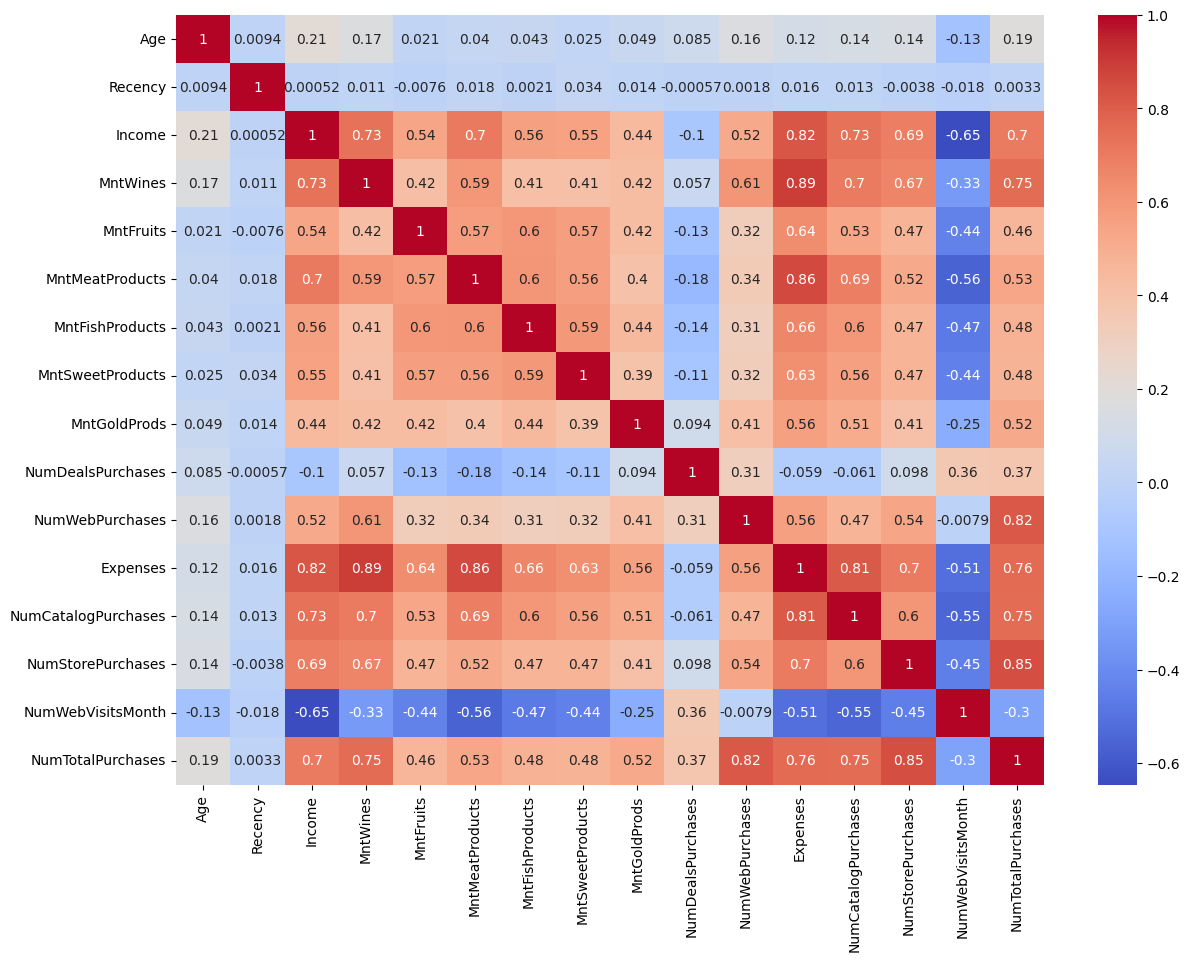

In [259]:
# Calculate the correlation matrix
corr_matrix = data[numerical_features].corr()

# Set the size of the plot
plt.figure(figsize=(14, 10))

#heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

* There are strong positive correlations between Income and the amount spent on various product categories(MntWines, MntFruits, MntMeatProducts, etc.). This indicates that customers with higher incomes tend to spend more on these products.

* There is a weak negative correlation of -0.018 between Recency and the number of web visits per month. This suggests that customers who made purchases more recently tend to visit the website less frequently.

In [263]:
data.to_csv('/content/drive/MyDrive/Job Hunt/Customer/clean_data.csv', index=False)